# 데이터 세트 준비

In [1]:
pwd

'/Users/i/Downloads/crosswalk_project2'

In [36]:
# 데이터세트 다운로드
!wget http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar

--2024-12-28 23:43:27--  http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
pjreddie.com (pjreddie.com) 해석 중... 162.0.215.52
다음으로 연결 중: pjreddie.com (pjreddie.com)|162.0.215.52|:80... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar [따라감]
--2024-12-28 23:43:27--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
다음으로 연결 중: pjreddie.com (pjreddie.com)|162.0.215.52|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 1999639040 (1.9G) [application/x-tar]
저장 위치: `VOCtrainval_11-May-2012.tar'

VOCtrainval_11-May-  26%[====>               ] 500.16M  --.-KB/s    /  2m 41s  

2024-12-28 23:46:09 (3.11 MB/s) - 524452033 바이트에 연결 끊음. 다시 시도 중.

--2024-12-28 23:46:10--  (시도횟수: 2)  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
다음으로 연결 중: pjreddie.com (pjreddie.com)|162.0.215.52|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... ^C


In [37]:
# 압축 해제
!tar -xf VOCtrainval_11-May-2012.tar
# 원본 압축 파일 제거
!rm VOCtrainval_11-May-2012.tar

VOCdevkit/VOC2012/JPEGImages/2008_007546.jpg: Truncated tar archive
tar: Error exit delayed from previous errors.


In [38]:
# 클래스 리스트 파일 생성
classes = ["aeroplane\n", "bicycle\n", "bird\n", "boat\n", "bottle\n", 
       "bus\n", "car\n", "cat\n", "chair\n", "cow\n", "diningtable\n", 
       "dog\n", "horse\n", "motorbike\n", "person\n", "pottedplant\n", 
       "sheep\n", "sofa\n", "train\n", "tvmonitor"]
with open('vocnames.txt','w') as f: # txt파일 생성
       f.writelines(classes)

In [39]:
pwd

'/Users/i/Downloads/crosswalk_project2'

In [40]:
# labels 폴더 생성
!git clone https://github.com/ssaru/convert2Yolo.git
# 파일 포맷 변환 xml to txt
!cd convert2Yolo && python3 example.py --datasets VOC \
--img_path ../VOCdevkit/VOC2012/JPEGImages/ \
--label ../VOCdevkit/VOC2012/Annotations/ \
--convert_output_path ../VOCdevkit/VOC2012/JPEGImages/ \
--img_type ".jpg" \
--manifest_path ../ \
--cls_list_file ../vocnames.txt ## 폴더 경로 : ./VOCdevkit/VOC2012/JPEGImages/
## * yolov5는 훈련할 때 이미지 파일과 라벨링된 텍스트 파일의 1)경로 와 2)이름은 동일해야한다.

'convert2Yolo'에 복제합니다...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (43/43), done. (24/43)
remote: Compressing objects: 100% (8/8), done.
remote: Total 215 (delta 38), reused 35 (delta 35), pack-reused 172 (from 1)
오브젝트를 받는 중: 100% (215/215), 994.67 KiB | 11.18 MiB/s, 완료.
델타를 알아내는 중: 100% (95/95), 완료.

VOC Parsing:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (17125/17125)  Complete�██████████████████████████████████--| 95.2% (16306/17125)  Complete:|███████████████████████████████████████-| 99.4% (17029/17125)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete



In [44]:
import os

def tree_style_structure(directory, max_files=3):
    def print_tree(current_dir, prefix=""):
        # 디렉토리 내 파일과 폴더 가져오기
        entries = os.listdir(current_dir)
        files = [f for f in entries if os.path.isfile(os.path.join(current_dir, f))]
        dirs = [d for d in entries if os.path.isdir(os.path.join(current_dir, d))]

        # 파일 출력 (최대 max_files까지만)
        for i, file in enumerate(files[:max_files]):
            connector = "├── " if i < len(files[:max_files]) - 1 or dirs else "└── "
            print(f"{prefix}{connector}{file}")

        # 생략된 파일 수 출력
        if len(files) > max_files:
            print(f"{prefix}└── ... ({len(files) - max_files} more)")

        # 하위 디렉토리 출력
        for i, dir_name in enumerate(dirs):
            connector = "├── " if i < len(dirs) - 1 else "└── "
            print(f"{prefix}{connector}{dir_name}")
            new_prefix = f"{prefix}│   " if i < len(dirs) - 1 else f"{prefix}    "
            print_tree(os.path.join(current_dir, dir_name), new_prefix)

    # 루트 디렉토리 이름 출력
    print(os.path.basename(directory))
    print_tree(directory)

# 사용자 입력 받기
directory_path = './VOCData'
if os.path.exists(directory_path):
    tree_style_structure(directory_path)
else:
    print("The specified directory does not exist.")


VOCData
├── train
│   ├── 2008_007339.txt
│   ├── 2008_003263.jpg
│   └── 2008_006027.txt
│   └── ... (6287 more)
└── val
    ├── 2007_000904.jpg
    ├── 2008_002241.txt
    └── 2008_004630.txt
    └── ... (2697 more)


In [7]:
pwd

'/Users/i/Downloads/crosswalk_project2'

# 데이터 분할 
- 훈련 : 검증 = 7 : 3
- 오류 개선 시도 들
    - 오류 1 : FileNotFoundError: [Errno 2] No such file or directory: './VOCdevkit/VOC2012/JPEGImages/2011_006135.jpg\n'
        - 원인 : ₩n 포함되어 발생
        - 해결 : ₩n을 제거하는 코드를 추가함. =>     img_path = img_path.strip()  
    - 오류 2 : FileNotFoundError: [Errno 2] No such file or directory: './VOCdevkit/VOC2012/JPEGImages/2011_006135.jpg'
        - 원인 : 2008_007576파일부터 jpg파일이 다운로드가 되지 않아 발생
        - 해결 : JPEGImages와 manifest.txt파일 내에서 2008_007548이후의 숫자가 포함된 txt파일 제거

In [41]:
import os

# 제거할 조건을 충족하는 항목을 확인
remove_after = int('2008_007548'.replace('_', ''))  # '2008_007548' -> 20080007548

# 파일을 읽어옵니다
n=0
with open('./manifest.txt', 'r') as f:
    files = f.readlines()

# 조건에 맞는 항목만 필터링
filtered_files = []

# 조건에 맞는 항목만 남겨서 새로운 리스트 생성
for file_path in files:
    n+=1
    # 파일 경로에서 숫자 부분 추출 
    file_name = os.path.basename(file_path.strip())  # 경로에서 파일 이름 추출
    number_part = int(file_name.split('.')[0].replace('_',''))  # 파일 이름에서 확장자를 제외한 부분
    # '2008_007548' 이후 숫자 포함된 파일은 제외
    if number_part < remove_after:
        filtered_files.append(file_path)
print(n,len(filtered_files))

# 기존 파일 삭제 후 새로운 파일 내용 기록
os.remove('./manifest.txt')
with open('./manifest.txt', 'w') as f:
    f.writelines(filtered_files)

17125 4495


In [42]:
import shutil
from tqdm import tqdm

## 폴더 경로 지정
data_root='./VOCData'
val_root=os.path.join(data_root,'val')
train_root=os.path.join(data_root,'train')
## 폴더 생성
os.makedirs(val_root,exist_ok=True)
os.makedirs(train_root,exist_ok=True)
## 이미지 경로 읽어오기
with open('./manifest.txt') as f:
    files=f.readlines()
    
for idx, img_path in tqdm(enumerate(files)):
    img_path = img_path.strip()  # 개행 문자 제거
    img_src=img_path.split('₩n')[0]
    txt_src=os.path.splitext(img_src)[0]+'.txt'
    img_name=os.path.split(img_src)[-1]
    text_name=os.path.split(txt_src)[-1]
    if idx%10<3: # 30%는 val data로 저장
        img_dst=os.path.join(val_root,img_name)
        text_dst=os.path.join(val_root,text_name)
    else: # 70%는 train data로 저장
        img_dst=os.path.join(train_root,img_name)
        text_dst=os.path.join(train_root,text_name)
    shutil.copy2(img_src,img_dst)
    shutil.copy2(txt_src,text_dst)

4495it [00:03, 1155.32it/s]


# Yolov5 훈련

In [45]:
# 훈련환경 준비
!git clone -b v7.0 https://github.com/jetsonai/yolov5 # 깃 저장소 복사

'yolov5'에 복제합니다...
remote: Enumerating objects: 15656, done.
remote: Total 15656 (delta 0), reused 0 (delta 0), pack-reused 15656 (from 1)
오브젝트를 받는 중: 100% (15656/15656), 14.58 MiB | 7.84 MiB/s, 완료.
델타를 알아내는 중: 100% (10686/10686), 완료.
Note: switching to '915bbf294bb74c859f0b41f1c23bc395014ea679'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [3]:
%cd yolov5

/Users/i/Downloads/crosswalk_project2/yolov5


In [6]:
%pip install -qr requirements.txt # 필수(requirements)패키지 설치

Note: you may need to restart the kernel to use updated packages.


## 환경 테스트

In [48]:
# 훈련 환경 테스트 v1
!python detect.py --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4

detect: weights=yolov5s.pt, source=../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-0-g915bbf2 Python-3.9.4 torch-2.2.2 CPU

100%|██████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 11.5MB/s]

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
video 1/1 (1/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: 384x640 1 person, 1 car, 1 traffic light, 291.9ms
video 1/1 (2/658) /Users/i/Downloads/DeepLearning4Projects/

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-0-g915bbf2 Python-3.9.4 torch-2.2.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /Users/i/Downloads/crosswalk_project2/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 334.9ms
image 2/2 /Users/i/Downloads/crosswalk_project2/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 266.3ms
Speed: 1.6ms pre-process, 300.6ms inference, 8.0ms NMS per image at shape (1, 3, 640, 640)
Results saved 

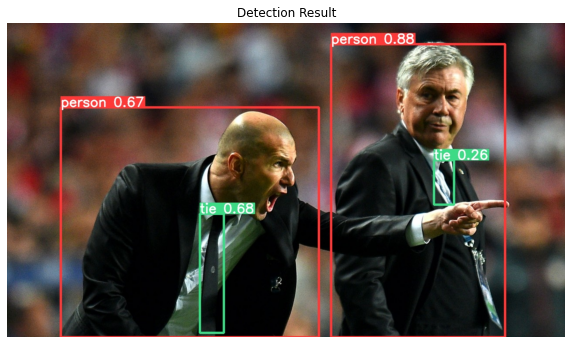

In [49]:
# 훈련 환경 테스트 v2
## 입력 데이터 해상도 640*640, confidence >=0.25인 객체만 검출
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./runs/detect/exp2/zidane.jpg')

# OpenCV는 BGR 형식을 사용하므로 RGB로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Matplotlib으로 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.title("Detection Result")
plt.show()

In [4]:
pwd

'/Users/i/Downloads/crosswalk_project2/yolov5'

## 훈련

In [ ]:
# yaml 파일 제작
text_lines='''
train:
    - ../VOCData/train
val:
    - ../VOCData/val
    
# Classes
names:
    0: aeroplane                  
    1: bicycle                    
    2: bird                       
    3: boat                       
    4: bottle                     
    5: bus                        
    6: car                        
    7: cat                        
    8: chair                      
    9: cow                        
    10: diningtable               
    11: dog                       
    12: horse                     
    13: motorbike                 
    14: person                    
    15: pottedplant               
    16: sheep                     
    17: sofa                      
    18: train                     
    19: tvmonitor
'''

with open('./vocdata.yaml','w') as f:
    f.write(text_lines)

In [ ]:
# 훈련 # 1160m 27.5s / cpu
!python train.py --img 480 --batch 16 --epochs 20 --data vocdata.yaml --weights yolov5s.pt --cache
## 훈련 해상도 : 640*640 => 480*480
## 배치 크기 : 16, 에포크 수 : 20, 가중치 : yolov5s.pt
## cache : 훈련을 빠르게하기 위해 사용. 데이터세트를 읽은 후 이진 파일로 저장

train: weights=yolov5s.pt, cfg=, data=vocdata.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v7.0-0-g915bbf2 Python-3.12.4 torch-2.3.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0

In [ ]:
# yolov5s 사전 가중치를 이용한 추론 테스트
## 결과 경로 : runs/detect/exp3
## 추론 시간 : 1m 7.2s
!python detect.py --weights ./yolov5s.pt --img 640 --conf 0.25 --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4 --view-img

detect: weights=['./yolov5s.pt'], source=../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-0-g915bbf2 Python-3.12.4 torch-2.3.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
video 1/1 (1/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: 384x640 1 person, 1 car, 1 traffic light, 84.8ms
video 1/1 (2/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: 384x640 1 person, 1 car, 1 traffic light, 113.5ms
video 1/1 (3/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/

In [22]:
# 책에서 훈련시킨 가중치로 추론 테스트 
## 결과 경로 : runs/detect/exp5
## 추론 시간 : 1m 0.6s
!python detect.py --weights ../book_weight/yolov5s_voc.pt --img 640 --conf 0.25 --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4 --view-img

detect: weights=['../book_weight/yolov5s_voc.pt'], source=../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-0-g915bbf2 Python-3.12.4 torch-2.3.1 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
video 1/1 (1/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: 384x640 1 bicycle, 1 car, 74.8ms
video 1/1 (2/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: 384x640 1 bicycle, 1 car, 70.5ms
video 1/1 (3/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.

In [24]:
pwd

'/Users/i/Downloads/crosswalk_project2/yolov5'

In [ ]:
# 직접 훈련시킨 가중치로 추론 테스트
## 결과 경로 : runs/detect/exp7
## 추론 시간 : 1m 0.1s
!python detect.py --weights ./runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4 --view-img

detect: weights=['./runs/train/exp2/weights/best.pt'], source=../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-0-g915bbf2 Python-3.12.4 torch-2.3.1 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
video 1/1 (1/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: 384x640 1 car, 82.8ms
video 1/1 (2/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: 384x640 1 car, 1 person, 95.9ms
video 1/1 (3/658) /Users/i/Downloads/DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4: 384